In [ ]:
 import numpy as np
 X_train = np.array([[8,8],[0,1],[6,4],[3,3],[4,8],[1,1],[4,6],[2,5]]) 
 y_train = np.array([1,-1,1,-1,1,-1,1,1])

In [ ]:
########################################################
# hw06: Implementation of the Perceptron_Train algorithm
########################################################
def Perceptron_Train(X, y, max_iter=100, verbose=0): 
  weights = np.array([1, 1])
  bias = 0
  accuracy_log = []
  for epoch in range(0,max_iter):
    if verbose: print("Start epoch ", epoch) 
    errors = 0
    accuracy =0
    # check all points
    for n in range(0,X.shape[0]):
      if verbose: print("Start data point ", n)
      feature = X[n]
      y_label = y[n]
      output = np.dot(weights,X[n])+bias
      if y_label * output <=0:
        if verbose: print("Start update weights") 
        weights = weights + y_label * feature 
        bias = bias + y_label
        errors += 1
      else:
        if verbose: print("Do nothing")
      if verbose: print("Latest weights: ", weights, " bias: ", bias, end="\n\n") 
      if verbose: print("Total errors afer epoch ", epoch, ": ", errors)
    accuracy = 1 - errors/X.shape[0] 
    accuracy_log.append(accuracy) 
    if errors == 0:
      print("Found classifier with errors: ", errors) 
      print("Weights: ",weights)
      print("bias: ",bias)
      break
  return weights,bias,accuracy_log

In [ ]:
# hw06: Implementation of the Perceptron_Test algorithm
########################################################
def Perceptron_Test(w,b, X):
  output_label = []
  for n in range(0,X.shape[0]):
    feature = X[n]
    output = np.dot(w,X[n])+b 
    if output > 0:
      output_label.append(1) 
    else:
      output_label.append(-1) 
  return output_label

In [ ]:
best_weights, bias, accuracy_log = Perceptron_Train(X_train,y_train, max_iter= 1, verbose= 1)

In [ ]:
best_weights, bias, accuracy_log = Perceptron_Train(X_train,y_train, max_iter= 100, verbose= 0)
len(accuracy_log)

Found classifier with errors:  0
Weights:  [-1  8]
bias:  -23


37

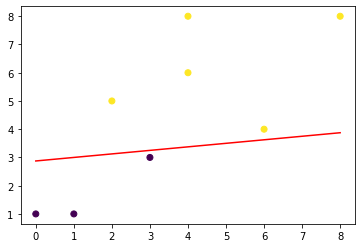

In [ ]:
#Plot of points
import matplotlib.pyplot as plt
plt.scatter(X_train[:,0],X_train[:,1],c=y_train) 
x = np.linspace(0,8,100)
y = 1/8*x+23/8
plt.plot(x, y, '-r')
plt.show()

In [ ]:
 X_test = np.array([[8,1],[0,2],[6,5],[3,2],[4,2],[1,1],[4,7],[2,6]]) 
 y_test = np.array([1,-1,1,-1,1,-1,1,1])

In [ ]:
predicted_labels = Perceptron_Test(best_weights,bias,X_test)
from sklearn.metrics import classification_report 
print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

          -1       0.60      1.00      0.75         3
           1       1.00      0.60      0.75         5

    accuracy                           0.75         8
   macro avg       0.80      0.80      0.75         8
weighted avg       0.85      0.75      0.75         8



In [ ]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_jobs=100, eta0=0.1, random_state=0)
ppn.fit(X_train,y_train)
y_pred = ppn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.67      0.80         3
           1       0.83      1.00      0.91         5

    accuracy                           0.88         8
   macro avg       0.92      0.83      0.85         8
weighted avg       0.90      0.88      0.87         8




Our code got an accuracy of 0.75 and sklearn got an accuracy of 0.88 which means that sklearn predicted one more correct than our algorithm

In [19]:
########################################################
# hw06: Part 3
########################################################
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
%cd /content/drive/'My Drive'/'Colab Notebooks'/Data
%ls

/content/drive/My Drive/Colab Notebooks/Data
breast-cancer.data  car.data    Finance2015-2019.xlsx  SPECTF.train
breastCancer.xlsx   ecoli.data  SPECTF.test            transfusion.data


In [21]:
import pandas as pd
finance_df = pd.read_excel("Finance2015-2019.xlsx")

In [23]:
Finance_df = finance_df.drop(columns="Unnamed: 16")
Finance_df

,COUNTY DISTRICT CODE,DISTRICT NAME,YEAR,PK ENROLLMENT,ENROLLMENT,PERCENT LOCAL,PERCENT STATE,PERCENT FEDERAL,AVERAGE DAILY ATTENDANCE,TOTAL EXPENDITURE,TAX RATE CEILING OPERATING FUNDS,ADJUSTED TAX RATE INCIDENTAL,ADJUSTED TAX RATE TEACHERS,ADJUSTED TAX RATE DEBT SERVICE,ADJUSTED TAX RATE CAPITAL PROJECTS,ASSESSED VALUATION
0,001-090,ADAIR CO. R-I,2019,20.0,219.0,0.375536,0.506465,0.118000,214.2832,3085586.95,3.750000e+00,3.75000,0.0000,0.5756,0.00,16662758.0
1,001-091,KIRKSVILLE R-III,2019,169.0,2419.0,0.478679,0.435423,0.085898,2395.6101,29716073.56,3.343400e+00,1.67170,1.6717,0.8190,0.00,236932486.0
2,001-092,ADAIR CO. R-II,2019,0.0,149.0,0.390852,0.508291,0.100857,138.1392,2540367.71,3.641600e+00,3.57690,0.0000,0.6511,0.00,15147176.0
3,002-089,NORTH ANDREW CO. R-VI,2019,9.0,359.0,0.393369,0.546242,0.060389,332.6979,4702172.33,4.344200e+00,3.36420,0.0000,0.0000,0.98,24045086.0
4,002-090,AVENUE CITY R-IX,2019,20.0,159.0,0.564473,0.392038,0.043489,203.5307,4454248.30,3.400700e+00,3.40070,0.0000,0.9800,0.00,25869781.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2778,115920,SOUTH CITY PREPARATORY ACADEMY,2015,NaN,188.0,0.405571,0.457217,0.137212,177.0769,2287820.28,3.885763e+06,12919.92507,NaN,NaN,NaN,NaN
2779,115921,JAMAA LEARNING CENTER,2015,NaN,151.0,0.121657,0.718431,0.159912,139.0963,1706697.52,1.919821e+06,12269.89877,NaN,NaN,NaN,NaN
2780,115922,BETTER LEARNING COMM ACADEMY,2015,NaN,194.0,0.101311,0.720358,0.178331,156.3472,1766496.74,1.956530e+06,11298.55053,NaN,NaN,NaN,NaN
2781,115923,EAGLE COLLEGE PREP ENDEAVOR,2015,NaN,206.0,0.203371,0.594179,0.202450,179.3879,2272233.33,2.500731e+06,12666.59195,NaN,NaN,NaN,NaN


In [24]:
Finance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2783 entries, 0 to 2782
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   COUNTY DISTRICT CODE                2783 non-null   object 
 1   DISTRICT NAME                       2783 non-null   object 
 2   YEAR                                2783 non-null   int64  
 3   PK ENROLLMENT                       2743 non-null   float64
 4   ENROLLMENT                          2782 non-null   float64
 5   PERCENT LOCAL                       2783 non-null   float64
 6   PERCENT STATE                       2783 non-null   float64
 7   PERCENT FEDERAL                     2781 non-null   float64
 8   AVERAGE DAILY ATTENDANCE            2780 non-null   float64
 9   TOTAL EXPENDITURE                   2780 non-null   float64
 10  TAX RATE CEILING OPERATING FUNDS    2746 non-null   float64
 11  ADJUSTED TAX RATE INCIDENTAL        2627 no

Dataset has 2782 inputs over five years of missouri k-12 finance data by district. There are 16 features. The output I want to study is the "total expenditure" which is a float data type. The only object types are the district code and district name. Also the year is an int and not a float which I might have to be careful with.

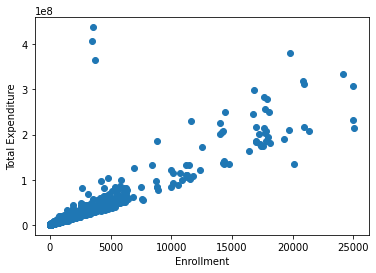

In [26]:
import matplotlib.pyplot as plt
plt.scatter(Finance_df["ENROLLMENT"],Finance_df["TOTAL EXPENDITURE"])
plt.xlabel("Enrollment")
plt.ylabel("Total Expenditure")
plt.show()

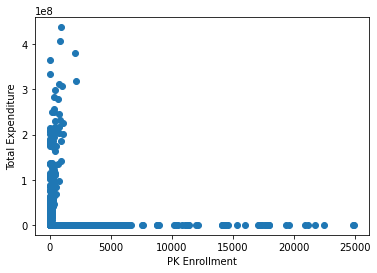

In [30]:
plt.scatter(Finance_df["PK ENROLLMENT"],Finance_df["TOTAL EXPENDITURE"])
plt.xlabel("PK Enrollment")
plt.ylabel("Total Expenditure")
plt.show()

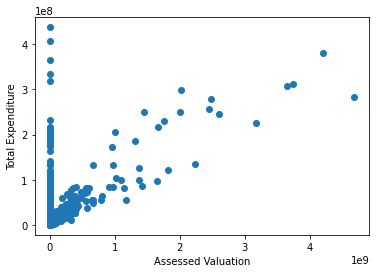

In [33]:
plt.scatter(Finance_df["ASSESSED VALUATION"],Finance_df["TOTAL EXPENDITURE"])
plt.xlabel("Assessed Valuation")
plt.ylabel("Total Expenditure")
plt.show()

In [27]:
Finance_df.describe()

,YEAR,PK ENROLLMENT,ENROLLMENT,PERCENT LOCAL,PERCENT STATE,PERCENT FEDERAL,AVERAGE DAILY ATTENDANCE,TOTAL EXPENDITURE,TAX RATE CEILING OPERATING FUNDS,ADJUSTED TAX RATE INCIDENTAL,ADJUSTED TAX RATE TEACHERS,ADJUSTED TAX RATE DEBT SERVICE,ADJUSTED TAX RATE CAPITAL PROJECTS,ASSESSED VALUATION
count,2783.000000,2743.000000,2782.000000,2783.000000,2783.000000,2781.000000,2.780000e+03,2.780000e+03,2.746000e+03,2627.000000,2591.000000,2591.000000,2591.000000,2.591000e+03
mean,2016.997844,656.689101,951.487835,0.454216,0.300465,901.132997,9.589729e+06,1.099147e+07,2.207577e+07,2218.966804,2.757950,0.206691,0.392413,3.939701e+07
std,1.413449,2131.895090,2585.230805,0.144433,0.193439,16184.146340,1.739502e+08,3.381507e+07,2.379661e+08,5486.914216,1.518266,0.510191,0.426327,2.396730e+08
min,2015.000000,0.000000,0.063737,0.020565,0.007451,0.007047,2.611100e+01,7.087840e+03,1.198000e+00,0.482300,0.000000,-0.216184,0.000000,-1.168396e-01
25%,2016.000000,4.465850,0.480332,0.377408,0.106585,0.088989,3.954452e+02,1.027535e+04,1.443160e+06,3.198100,2.442500,0.000000,0.000000,0.000000e+00
50%,2017.000000,53.000000,164.500000,0.455423,0.331269,0.135525,2.109044e+03,2.061351e+06,4.678522e+06,3.738900,3.137900,0.000000,0.270000,0.000000e+00
75%,2018.000000,388.000000,693.750000,0.521998,0.466393,342.689500,3.353745e+06,6.840708e+06,1.214530e+07,5.118800,3.713750,0.000000,0.748900,4.163500e-01
max,2019.000000,24955.000000,25055.000000,0.967059,0.848553,847306.294900,9.086555e+09,4.372999e+08,1.226389e+10,175366.823500,6.576900,3.249900,1.855100,4.684978e+09


In [28]:
Finance_df.value_counts()

COUNTY DISTRICT CODE  DISTRICT NAME       YEAR  PK ENROLLMENT  ENROLLMENT    PERCENT LOCAL  PERCENT STATE  PERCENT FEDERAL  AVERAGE DAILY ATTENDANCE  TOTAL EXPENDITURE  TAX RATE CEILING OPERATING FUNDS  ADJUSTED TAX RATE INCIDENTAL  ADJUSTED TAX RATE TEACHERS  ADJUSTED TAX RATE DEBT SERVICE  ADJUSTED TAX RATE CAPITAL PROJECTS  ASSESSED VALUATION
115-115               ST. LOUIS CITY      2019  2070.0000      19778.000000  0.751535       0.111030       0.137435         1.905447e+04              3.805514e+08       4.516000e+00                      4.51600                       0.0000                      0.6211                          0.0000                              4.201815e+09          1
64075                 HANNIBAL 60         2017  3499.0000      0.471383      0.435908       0.092709       3269.617600      2.833480e+07              8.666090e+03       4.542788e+07                      3.08670                       3.0867                      0.0000                          0.8500

The data that I am using comes from dese.mo.gov and I have combined the data from 2015-2019 into one dataset. Something of note is that some of the years do not have certain columns. There is quite a few districts with missing values for PK Enrollment since not all districts provide PK education and for some years it is not recorded. Also the same thing applies to Assessed Valuation. So I am going to have to filter out the rows that do not have values for these columns if I am going to use them in the analysis Another thing is that the districts and district codes only have five values each so it may not be useful to use that towards fitting the data but maybe for filtering. Another thing to be mindful of is that the total expenditure values are very large compared to any of the other values so it would be useful to scale the values when fitting the data. 